# DSCI 6003 Skills Test 2

### Problem 1:

A. For each line of code (except imports) provide a one-line annotation describing what the next line does so that someone without that line of code could easily write their own code that does the same thing, i.e.

```python
    
    # Generates an m X n matrix of random samples from the dirichlet distribution and stores to the global variables X in the form of a numpy array
 
    X = np.random.dirichlet(alpha=0.02, size=(m,n))

```

B. Write a single paragraph description of what is taking place in the below code and attached figure. Study the code and output carefully.

C. What happens if you increase or decrease k1 or the number of samples? Why? Produce a graph and complete explanation of this behavior.


Populating the interactive namespace from numpy and matplotlib
(1000, 1)


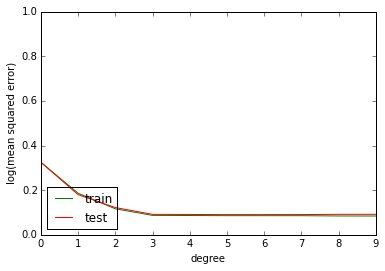

In [34]:
%pylab inline

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

try:
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
except ImportError:
    # use backports for sklearn 1.4
    # available from https://s3.amazonaws.com/datarobotblog/notebooks/sklearn_backports.py
    from sklearn_backports import PolynomialFeatures
    from sklearn_backports import make_pipeline


def func(x):
    print X.shape
    return np.sin(2 * np.pi * x.dot(x.T))


k1 = 1
n_samples = 1000
X = np.random.uniform(0, 1, size=(n_samples, k1))
y = func(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)


train_error = np.empty(10)
test_error = np.empty(10)
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='lower left')


### Problem 2:

Quickly read the documentation about the dataset warehoused at [this location](http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant). Note that the dataset is downloadable from the links on the top. You will need to unzip it, naturally, into a local directory. The data files are given as an Excel (.xlsx) extension. You can simply copy and paste into a text file so as to create a new (.txt) file, that you can load with numpy loadtxt or pandas. You can also [load excel with pandas](http://pandas-docs.github.io/pandas-docs-travis/10min.html#excel).

Produce a professional quality regularized regression study of this data, with a full study of feature selection, proper choice of regularization, a full study (with graphs) of choice of the regularization parameter and features selection for optimal bias-variance tradeoff. Make sure to validate your model completely. Choose the best parameters for the regression and provide a one paragraph explanation of all your choices. 


## Problem 3 (reach goal):

Create a study of [this system](http://archive.ics.uci.edu/ml/datasets/CNAE-9). You may need to extract features using PCA/LDA/QDA in order to reduce the dimensionality of the data. You might consider all classifiers that you have learned so far.